# Python tools for image processing

In image processing we often want to manipulate images through programming. This is best done with high level programming languages such as python or Matlab. This course's assignments will mostly focus on image processing with python. 

Digital images are arrays of pixels in three dimensions *HxWxC*. *C* stands for channel or color channel and the size of that dimension is equal to the number of color channels. Three examples of common color spaces are RGB, HSV and CMYK.

## Short introduction to jupyter notebooks

Jupyter notebooks are a common tool in the scientific community. They allow you to combine text and code seamlessly, and allow simple execution of short code snippets.

### Basic usage

You can create new cells by clicking the + icon in the task bar. Then you can choose what type of cell to create from the drop down menu. Markdown and code cells are what you will be using for the most part. 

Intuitively you may execute code or compile the markdown text with the same command: "shift + enter". Within each python cell you may import modules and execute code just like in a normal .py file or in a python shell. Markdown in jupyter notebooks support all common markdown features, and a handy cheatsheet can be found [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#code). In addition to the operations defined there, you may write mathematical expressions with latex syntax.

Example:

$$ f(z) = \frac{1}{1 + e^{- z}}$$

### Widgets
This and further notebooks will utilize ipywidgets for interactive demonstrations. A short introduction can be found [here](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html) and [here](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).

## Introduction to numpy and matplotlib

This section is supposed to give a short and simple introduction to numpy. If you already are familiar with the tools, feel free to skip this section. On the other hand, if you need a more thorough and extensive introduction it can be found [here](https://towardsdatascience.com/the-ultimate-beginners-guide-to-numpy-f5a2f99aef54).

### First look at numpy
Numpy is a python library for matrix manipulation and adds support for a number of high-level mathematical operations. Numpy allows for vectorization of operations which is alot faster than traditional for-loops in python.

To get started with numpy we must import the library. The short-hand np is standarized, and is the recommended way to import numpy.

In [3]:
import numpy as np

We can then declare zero-initialized arrays or declare arrays from existing python lists. There are of course a number of other possible options for initializing our arrays which can be explored in the [docs](https://numpy.org/doc/stable/reference/routines.array-creation.html).

In [8]:
python_list = [[1.  if (i + j) % 2 == 0 else 0. for i in range(8)] for j in range(8)]

np_from_list = np.array(python_list)
print(np_from_list)

#When initializing an array without any data we must provide the dimensions
np_zero = np.zeros((8,8))
print(np_zero)

[[1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


### Displaying images
Most often we do not want to view the matrices as numbers, we want to visualize them as images. This can be done by utilising another python library which builds on numpy: matplotlib.

In [4]:
from matplotlib import pyplot as plt

We display images with the method imshow. If we want to display grayscale images we must supply the color map argument *cmap* as "gray". Gray-scale images will be normalized for us, so we usually do not need to worry if we supply negative values or intensities not within the $[0, 255]$ range.

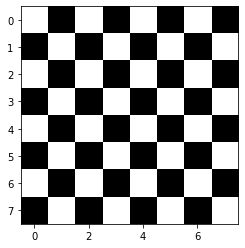

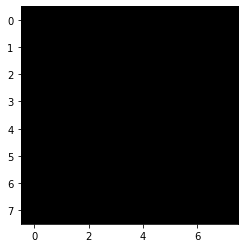

In [9]:
plt.imshow(np_from_list, cmap = "gray")
plt.show()
plt.imshow(np_zero, cmap = "gray")
plt.show()

Since images are normalized, we will often encounter problems if we want to display really bright or dark images. The extreme case is trying to display all white images.

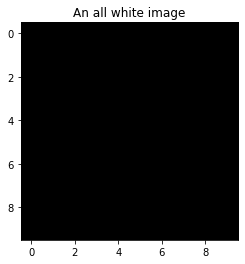

In [13]:
all_white = np.array([[255 for i in range(10)] for j in range(10)], dtype = np.uint8)
plt.title("An all white image")
plt.imshow(all_white, cmap = "gray")
plt.show()

The solution is to manually supply the correct min- and max-value to imshow.

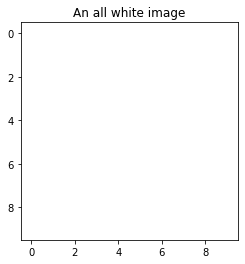

In [14]:
plt.title("An all white image")
plt.imshow(all_white, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

### Making figures
In the assigments it is often necessary to display multiple images together. A good way to do this is to make one figure with multiple subfigures.

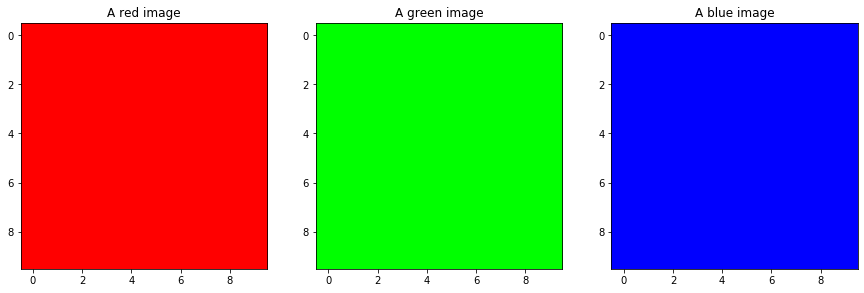

In [10]:
red_image = np.array([[[255,0,0] for i in range(10)] for j in range(10)])
green_image = np.array([[[0,255,0] for i in range(10)] for j in range(10)])
blue_image = np.array([[[0,0,255] for i in range(10)] for j in range(10)])

#Declare a figure, size is given as w,h
plt.figure(figsize=(15,5))

#Declare a subplot, the arguments are total_rows, total_colums, current index
plt.subplot(1,3,1)
#Give a fitting title with plt.title
plt.title("A red image")
plt.imshow(red_image)

plt.subplot(1,3,2)
plt.title("A green image")
plt.imshow(green_image)

plt.subplot(1,3,3)
plt.title("A blue image")
plt.imshow(blue_image)
plt.show()

### Importing images

We now demonstrated how to visualize images, but checkerboards and all black frames are not very interesting. This next step will show how we can utilise matplotlib to read images and import them into numpy arrays.

In [ ]:
image_path = "images/strawberry.jpg"

im_array = plt.imread(image_path)
plt.imshow(im_array)
plt.show()

### Checking the shape of an array
Often we want to know the dimensions of our image. This can be done like this:

In [ ]:
shape = im_array.shape
print(f"Image dimensions: {shape}")

From this we see that pyplot imports images in the order *HxWxC*.

### Slicing in numpy

Numpy arrays can be indexed and sliced as normal python lists, but the syntax is a bit different. We comma separate the indices within one single box bracket \[\] instead of using one bracket for each index. 

In [ ]:
im_copy = im_array.copy()
im_copy[100:400, 100:400, :] = [0, 0, 255]
plt.imshow(im_copy)
plt.show()

### Some practical applications
Now we will take a look at a couple of practical applications.

#### Translating an image
To translate an image we make a copy of the same size. Then, for each pixel in the output image, we find the corresponding pixel in the source image.

In [31]:
from ipywidgets import interact_manual
import ipywidgets as widgets
def translate_image(image, dy, dx):
    #When we want to find the corresponding pixel in source from output
    #We must apply the inverse transform
    dy = -dy
    dx = -dx
    
    #Make a zero_initialized array of same shape as image
    output_image = np.zeros_like(image)
    h, w = output_image.shape[:2]
    for x in range(w):
        for y in range(h):
            old_x = x + dx
            old_y = y + dy
            if old_x < w and old_y < h and old_x > 0 and old_y > 0:
                output_image[y,x] = image[old_y, old_x]
    return output_image

def display_image(dy, dx):
    image = plt.imread("images/strawberry.jpg")
    plt.imshow(translate_image(image, dy, dx))
    plt.show()

_ = interact_manual(display_image, dy = widgets.IntSlider(min=-500, max= 500, step=50),\
             dx = widgets.IntSlider(min=-500, max= 500, step=50) )

interactive(children=(IntSlider(value=0, description='dy', max=500, min=-500, step=50), IntSlider(value=0, des…

#### Rotating images
To rotate images we apply the same techniqeue as when translating. We loop over the output image, and use the inverse transform to find the corresponding pixel in the input image. 

To rotate an image we apply what we have learnt about affine transformations from the graphics part of the course. We want to rotate around the middle pixel of the image, so we first translate such that the middle pixel is in origin, then we apply the inverse translation, and finally we translate back. These transformations may be combined into one matrix for faster calculations.

Note that the direction of the translation seems wrong at first, and may be confusing. This is because our coordinate system has the y-axis increasing downwards instead of upwards. Then positive rotation will be clock-wise instead of counter-clockwise which we usually are accustomed to.

In [30]:
def make_rotation_matrix(radians, dx, dy):
    #Matrices in numpy are simply 2-dimensional arrays
    inverse_translate = np.array([[1, 0, -dx],
                                  [0, 1, -dy],
                                  [0, 0,  1 ]])
    rotation_matrix = np.array([[np.cos(radians), -np.sin(radians), 0],
                                 [np.sin(radians),  np.cos(radians), 0],
                                 [0, 0, 1]])
    translate = np.array([[1, 0, dx],
                          [0, 1, dy],
                          [0, 0, 1 ]])
    
    #Matrix multiplication can be done in numpy with the @ operator
    return translate@rotation_matrix@inverse_translate

def rotate_image(image, degrees):
    rad = degrees/180 * np.pi
    transform_matrix = make_rotation_matrix(-rad, image.shape[1]//2, image.shape[0]//2)
    
    output_image = np.zeros_like(image)
    h, w = output_image.shape[:2]
    for y in range(h):
        for x in range(w):
            #When multiplying vectors and matrices we must make sure that the shapes match up
            #The reshape method comes in handy here
            old_x, old_y, _ = (transform_matrix @ np.array([x,y,1]).reshape((3,1))).astype(int)
            if old_x < w and old_y < h and old_x > 0 and old_y > 0:
                output_image[y,x] = image[old_y, old_x]
    return output_image




def display_image(deg):
    image = plt.imread("images/strawberry.jpg")
    image = rotate_image(image, deg)
    image[:15,:15] = [0,0,0]
    plt.imshow(image)
    plt.show()

_ = interact_manual(display_image, deg = widgets.IntSlider(min=-180, max= 180, step=5))

interactive(children=(IntSlider(value=0, description='deg', max=180, min=-180, step=5), Button(description='Ru…

## Reading and writing video
Sometimes we want to work on video sequences instead of images. One such use case is applying deep learning detection models to video sequences. Generally what we usually want is to extract each individual frame from the video iteratively, or to produce a video from individual frames.

This notebook will teach how to read and write video using [Open CV](https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html#).

### Reading videos
Reading video with open cv is as simple as two function calls: one for initializing the video capture object and one for retrieving each frame.

In [ ]:
#First we need to import the module
import cv2

#Video capture is quite simple with open cv. All we need is a file path.
file_path = "images/traffic_video.mp4"
video_cap = cv2.VideoCapture(file_path)    

We can get each frame iteratively by calling video_cap.read()
The method returns a boolean retrieval value which specifies whether we successfully got an image or not.

In [ ]:
retrieval_value, frame = video_cap.read()
plt.figure(figsize=(10,10))
plt.imshow(frame)
plt.show()
#To capture all frames in the video we may use a while loop.

Open CV will per default use BGR images, while matplotlib uses RGB images. In order to use the two libraries together we must convert the frames to rgb.

In [ ]:
RGB_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(RGB_img)
plt.show()

To get all frames in a video, we can simply loop while the retrieval value is true. When we are done, we release the video.

In [ ]:
while(retrieval_value):
    retrieval_value, frame = video_cap.read()
video_cap.release()

### Writing videos
Writing videos is similarly done with Open CV. We need to define output path, fourcc, fps and frame size. Fourcc is a 4-character code of codec used to compress the frames.[List over possible fourcc's](http://www.fourcc.org/codecs.php). Usually we want to use "mpv4".

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
path_to_output = "my_first_video.mp4"
video_writer = cv2.VideoWriter(            
            filename= path_to_output, 
            fourcc = fourcc, 
            fps = 30.0, 
            frameSize = (512, 512))  

Writing images to video is as simple as reading images from video, all we need is one function call. In order to make a nice progress bar we can use the library tqdm and wrap our iterable for-loop.

In [ ]:
import tqdm
for i in tqdm.tqdm(range(200)):
    #Make the video-frame
    image = np.array([[[i, np.sqrt((x-256)**2 + (y-256)**2)*255/i, 255-i] if (x-256)**2 + (y-256)**2 < i**2 else [255,255,255]\
                       for x in range(512)] for y in range(512)], dtype=np.uint8)
    #Write the video-frame to video
    video_writer.write(image)
video_writer.release() 

## Exercises

### 1. Array creation
Declare a 255x255x1 black/white image which is all black except for a white circle in the middle. Display the image to screen.

In [ ]:
#Write your code here

#### Example solution

In [ ]:
python_list = [[1. if ((i-127)**2 + (j-127)**2 < 900) else 0. for i in range(255)] for j in range(255)]
np_array = np.array(python_list)
plt.imshow(np_array, cmap = "gray")
plt.show()

### 2. Creative task

Take the original strawberry image from the introduction and see if you can change the background color from blue to something else without affecting the non-background objects too much.

In [ ]:
image_path = "images/strawberry.jpg"

image = plt.imread(image_path)

#### Example solution
This could probably be vectorized for performance, but displays the idea nicely.

In [ ]:
result = np.zeros_like(image)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        #Set the pixel to black if blue is the dominant color
        result[y,x,:] = image[y,x,:] if image[y,x,0]**2 + image[y,x,1]**2 > image[y,x,2]**2 else [0,0,0]
plt.imshow(result)
plt.show()

result = np.zeros_like(image)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        result[y,x,:] = image[y,x,:] if image[y,x,0]**2 + image[y,x,1]**2 < image[y,x,2]**2 else [0,0,0]
plt.imshow(result)
plt.show()